In [1]:
#Used modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns

#Change plot style
%matplotlib inline
plt.rcParams['figure.dpi'] = 300
plt.rcParams.update({'font.size': 4})

#Dataset source: https://www.kaggle.com/miroslavsabo/young-people-survey
df = pd.read_csv('./DataSet/responses.csv')
ds = pd.read_csv('./DataSet/columns.csv')

### Check dataframe shape and size
First we need to look how big is our dataframe and if there is more rows than columns.

In [2]:
num_rows = df.shape[0] #Provide the number of rows in the dataset
num_cols = df.shape[1] #Provide the number of columns in the dataset
print('There are {0} rows and {1} columns in our dataset. It looks {2}OK.'.format(num_rows, num_cols, 'NOT ' if (num_rows<num_cols) else ''))
df.describe() #Take a first look on our dataset

There are 1010 rows and 150 columns in our dataset. It looks OK.


,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings
count,1007.000000,1008.000000,1006.000000,1005.000000,1005.000000,1003.000000,1008.000000,1007.000000,1004.000000,1007.000000,...,1008.000000,1008.000000,1007.000000,1007.000000,1010.000000,1008.00000,1003.000000,990.000000,990.000000,1004.000000
mean,4.731877,3.328373,3.113320,2.288557,2.123383,2.956132,2.761905,3.471698,3.761952,2.361470,...,3.234127,3.050595,3.201589,3.106256,2.870297,3.55754,20.433699,173.514141,66.405051,1.297809
std,0.664049,0.833931,1.170568,1.138916,1.076136,1.252570,1.260845,1.161400,1.184861,1.372995,...,1.323062,1.306321,1.188947,1.205368,1.284970,1.09375,2.828840,10.024505,13.839561,1.013348
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,15.000000,62.000000,41.000000,0.000000
25%,5.000000,3.000000,2.000000,1.000000,1.000000,2.000000,2.000000,3.000000,3.000000,1.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,3.00000,19.000000,167.000000,55.000000,1.000000
50%,5.000000,3.000000,3.000000,2.000000,2.000000,3.000000,3.000000,4.000000,4.000000,2.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,4.00000,20.000000,173.000000,64.000000,1.000000
75%,5.000000,4.000000,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,5.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.00000,22.000000,180.000000,75.000000,2.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,30.000000,203.000000,165.000000,10.000000


### Let's see what is inside
We have a lot of columns with different questions. We would like to focuse on interesting colerations between music preferences and bad habits

In [3]:
df.columns.values

array(['Music', 'Slow songs or fast songs', 'Dance', 'Folk', 'Country',
       'Classical music', 'Musical', 'Pop', 'Rock', 'Metal or Hardrock',
       'Punk', 'Hiphop, Rap', 'Reggae, Ska', 'Swing, Jazz', 'Rock n roll',
       'Alternative', 'Latino', 'Techno, Trance', 'Opera', 'Movies',
       'Horror', 'Thriller', 'Comedy', 'Romantic', 'Sci-fi', 'War',
       'Fantasy/Fairy tales', 'Animated', 'Documentary', 'Western',
       'Action', 'History', 'Psychology', 'Politics', 'Mathematics',
       'Physics', 'Internet', 'PC', 'Economy Management', 'Biology',
       'Chemistry', 'Reading', 'Geography', 'Foreign languages',
       'Medicine', 'Law', 'Cars', 'Art exhibitions', 'Religion',
       'Countryside, outdoors', 'Dancing', 'Musical instruments',
       'Writing', 'Passive sport', 'Active sport', 'Gardening',
       'Celebrities', 'Shopping', 'Science and technology', 'Theatre',
       'Fun with friends', 'Adrenaline sports', 'Pets', 'Flying', 'Storm',
       'Darkness', 'Heights', '

### Create subset
Now we need to clean up our DB to work with less columns. In this notebook we will focuse on relationship between bad habits, music and individuals so we dont need other colums now.

In [4]:
df = df[['Age', 'Gender', 'Smoking', 'Alcohol', 'Dance', 'Folk', 'Country',
       'Classical music', 'Musical', 'Pop', 'Rock', 'Metal or Hardrock',
       'Punk', 'Hiphop, Rap', 'Reggae, Ska', 'Swing, Jazz', 'Rock n roll',
       'Alternative', 'Latino', 'Techno, Trance', 'Opera', 'Number of friends', 
       'Branded clothing', 'Cheating in school', 'Only child', 
       'Left - right handed', "Parents' advice", 'Getting up', 'God']]

### Check for NaNs

Now we have less columns however we still didnt checked if all data are valid and without NaNs

In [5]:
#Check how many NaNs we have in each columns
df.isna().mean()

Age                    0.006931
Gender                 0.005941
Smoking                0.007921
Alcohol                0.004950
Dance                  0.003960
Folk                   0.004950
Country                0.004950
Classical music        0.006931
Musical                0.001980
Pop                    0.002970
Rock                   0.005941
Metal or Hardrock      0.002970
Punk                   0.007921
Hiphop, Rap            0.003960
Reggae, Ska            0.006931
Swing, Jazz            0.005941
Rock n roll            0.006931
Alternative            0.006931
Latino                 0.007921
Techno, Trance         0.006931
Opera                  0.000990
Number of friends      0.000000
Branded clothing       0.001980
Cheating in school     0.003960
Only child             0.001980
Left - right handed    0.002970
Parents' advice        0.001980
Getting up             0.004950
God                    0.001980
dtype: float64

### Drop NaNs

It looks like we are missing very small amount of data. Right way will be try to impute missing data however imputation of anything else then Age could bias our dataset due to small amount of individuals. For that reason we decided to drop all NaNs expect 'Age' where we try to fill them with means.

In [6]:
#Drop all rows where any cell contains NaN within selected columns
subdata = df.dropna(subset=['Gender', 'Smoking', 'Alcohol', 'Dance', 'Folk', 'Country',
       'Classical music', 'Musical', 'Pop', 'Rock', 'Metal or Hardrock',
       'Punk', 'Hiphop, Rap', 'Reggae, Ska', 'Swing, Jazz', 'Rock n roll',
       'Alternative', 'Latino', 'Techno, Trance', 'Opera', 'Number of friends', 
       'Branded clothing', 'Cheating in school', 'Only child', 
       'Left - right handed', "Parents' advice", 'Getting up', 'God']) 
 #Check how many NaNs we have in each columns
subdata.isna().mean()

Age                    0.00663
Gender                 0.00000
Smoking                0.00000
Alcohol                0.00000
Dance                  0.00000
Folk                   0.00000
Country                0.00000
Classical music        0.00000
Musical                0.00000
Pop                    0.00000
Rock                   0.00000
Metal or Hardrock      0.00000
Punk                   0.00000
Hiphop, Rap            0.00000
Reggae, Ska            0.00000
Swing, Jazz            0.00000
Rock n roll            0.00000
Alternative            0.00000
Latino                 0.00000
Techno, Trance         0.00000
Opera                  0.00000
Number of friends      0.00000
Branded clothing       0.00000
Cheating in school     0.00000
Only child             0.00000
Left - right handed    0.00000
Parents' advice        0.00000
Getting up             0.00000
God                    0.00000
dtype: float64

### Impute rest of NaNs
As we can see we still have some NaNs in Age column. Take a look on proportion of individuals in these two columns and find a way how to impute missing values.

<AxesSubplot:>

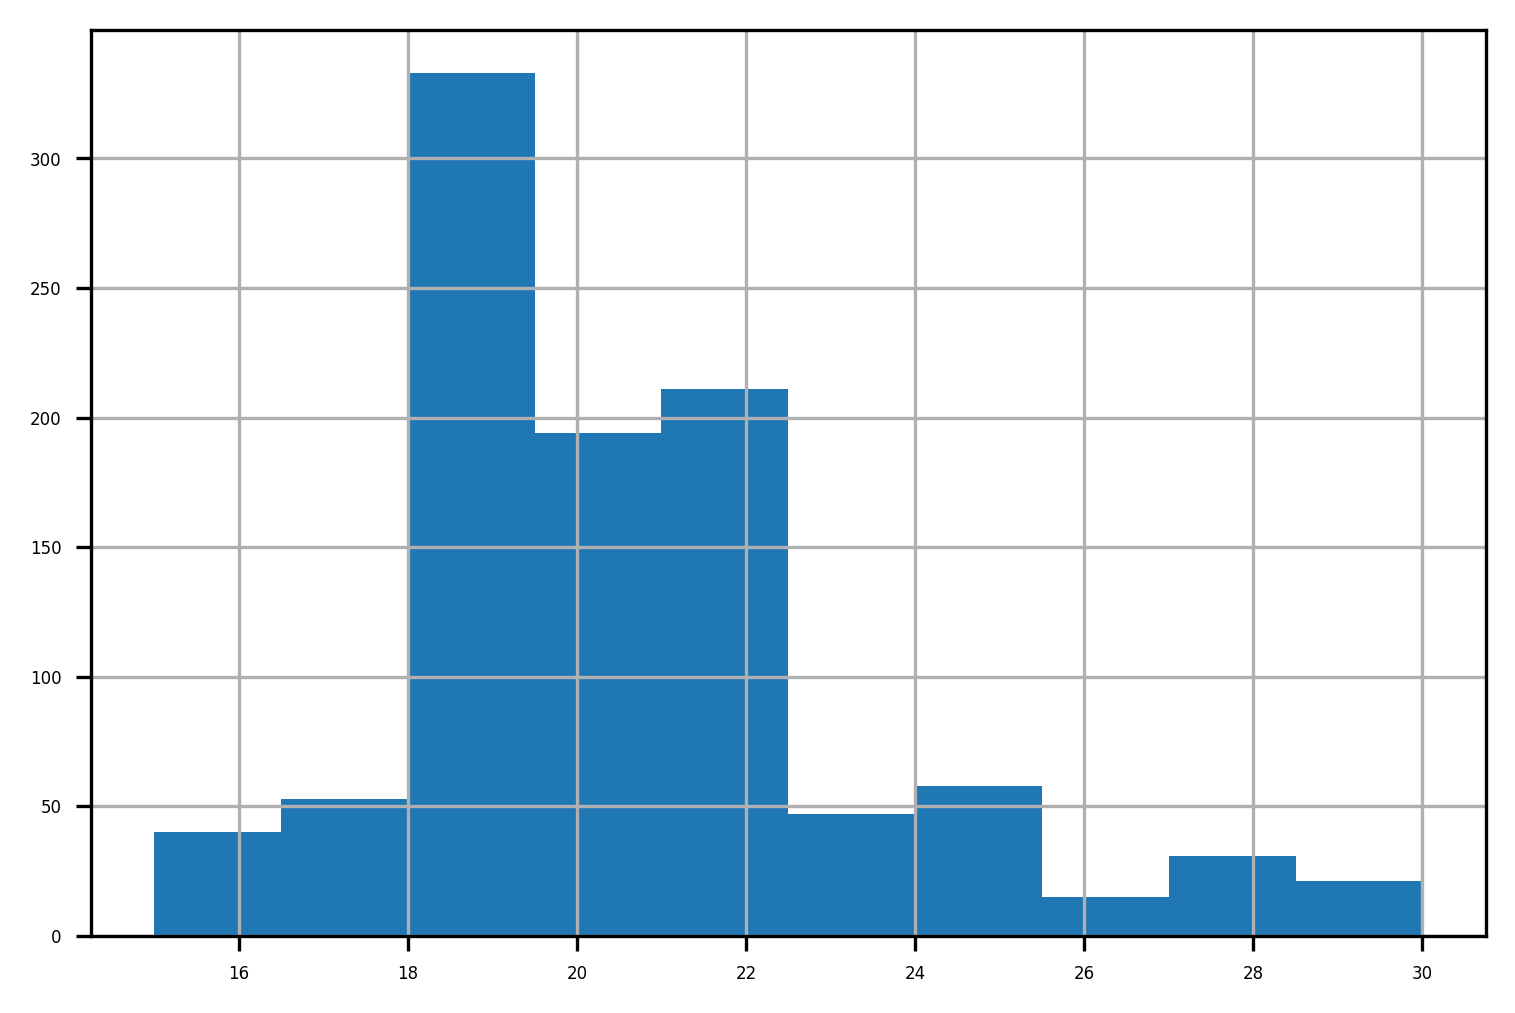

In [7]:
df.Age.hist()

It looks like there is no large spread of values which means best solution how to impute missing NaN will be fill them with mean.

In [8]:
#List all rows with missing Age
df[df['Age'].isna()]

,Age,Gender,Smoking,Alcohol,Dance,Folk,Country,Classical music,Musical,Pop,...,"Techno, Trance",Opera,Number of friends,Branded clothing,Cheating in school,Only child,Left - right handed,Parents' advice,Getting up,God
137,NaN,NaN,never smoked,never,4.0,3.0,3.0,5.0,5.0,5.0,...,2.0,2.0,1,1.0,2.0,yes,right handed,5.0,3.0,4.0
142,NaN,male,never smoked,social drinker,4.0,1.0,3.0,2.0,2.0,4.0,...,2.0,1.0,2,5.0,3.0,no,left handed,2.0,5.0,2.0
462,NaN,female,tried smoking,social drinker,3.0,1.0,2.0,3.0,1.0,3.0,...,3.0,1.0,2,3.0,1.0,no,right handed,4.0,1.0,3.0
549,NaN,female,current smoker,social drinker,5.0,1.0,2.0,2.0,3.0,5.0,...,4.0,2.0,3,1.0,2.0,no,left handed,3.0,2.0,3.0
735,NaN,female,never smoked,never,1.0,3.0,2.0,4.0,2.0,1.0,...,1.0,3.0,2,2.0,2.0,no,right handed,5.0,5.0,5.0
902,NaN,male,never smoked,never,1.0,2.0,2.0,3.0,1.0,2.0,...,2.0,1.0,2,3.0,2.0,no,right handed,3.0,4.0,3.0
960,NaN,female,never smoked,social drinker,4.0,4.0,1.0,5.0,1.0,3.0,...,1.0,4.0,4,1.0,3.0,no,right handed,3.0,4.0,5.0


It looks like there is no large spread of values which means best solution how to impute missing NaN will be fill them with mean.

In [9]:
#lambda function used to fill NaNs with mean
fill_mean = lambda col: col.fillna(col.mean())
#Apply lambda function for both columns
filled_subdata = df[['Age']].apply(fill_mean, axis=0)
#Concate Age column with previous subdata columns and put them into result
data = pd.concat([subdata[['Gender', 'Smoking', 'Alcohol', 'Dance', 'Folk', 'Country',
       'Classical music', 'Musical', 'Pop', 'Rock', 'Metal or Hardrock',
       'Punk', 'Hiphop, Rap', 'Reggae, Ska', 'Swing, Jazz', 'Rock n roll',
       'Alternative', 'Latino', 'Techno, Trance', 'Opera', 'Number of friends', 
       'Branded clothing', 'Cheating in school', 'Only child', 
       'Left - right handed', "Parents' advice", 'Getting up', 'God']], filled_subdata], axis=1, join="inner")
data.isna().mean()


Gender                 0.0
Smoking                0.0
Alcohol                0.0
Dance                  0.0
Folk                   0.0
Country                0.0
Classical music        0.0
Musical                0.0
Pop                    0.0
Rock                   0.0
Metal or Hardrock      0.0
Punk                   0.0
Hiphop, Rap            0.0
Reggae, Ska            0.0
Swing, Jazz            0.0
Rock n roll            0.0
Alternative            0.0
Latino                 0.0
Techno, Trance         0.0
Opera                  0.0
Number of friends      0.0
Branded clothing       0.0
Cheating in school     0.0
Only child             0.0
Left - right handed    0.0
Parents' advice        0.0
Getting up             0.0
God                    0.0
Age                    0.0
dtype: float64

### Reduce number of categhorical values

We would like to reduce number of values in our dataset related to the Smoking and Alcohol values. We are interested only in information if individuals has or not any experience with alcohol or smoking.

In [10]:
def smoking(smoke_exp):
    if smoke_exp == 'tried smoking' or smoke_exp == 'current smoker' or smoke_exp == 'former smoker':
        return 1
    else: 
        return 0
    
data['SmokingExperience'] = data['Smoking'].apply(smoking)
data = data.drop(columns=['Smoking'])

In [11]:
def alcohol(alcohol_exp):
    if alcohol_exp == 'social drinker' or alcohol_exp == 'drink a lot':
        return 1
    else: 
        return 0
    
data['AlcoholExperience'] = data['Alcohol'].apply(alcohol)
data = data.drop(columns=['Alcohol'])

### Convert catheghorical variables into numeric

As we want to see more behind the data we need to transform our dataset to numeric only

In [12]:
cat_vars = data.select_dtypes(include=['object']).copy().columns
for var in cat_vars:
    # for each cat add dummy var, drop original column
    data = pd.concat([data.drop(var, axis=1), pd.get_dummies(data[var], prefix=var, prefix_sep='_', drop_first=False)], axis=1)

# Fill numeric columns with the mean
num_vars = data.select_dtypes(include=['float', 'int']).columns
for col in num_vars:
    data[col].fillna((data[col].mean()), inplace=True)

In [13]:
data.columns.values

array(['Dance', 'Folk', 'Country', 'Classical music', 'Musical', 'Pop',
       'Rock', 'Metal or Hardrock', 'Punk', 'Hiphop, Rap', 'Reggae, Ska',
       'Swing, Jazz', 'Rock n roll', 'Alternative', 'Latino',
       'Techno, Trance', 'Opera', 'Number of friends', 'Branded clothing',
       'Cheating in school', "Parents' advice", 'Getting up', 'God',
       'Age', 'SmokingExperience', 'AlcoholExperience', 'Gender_female',
       'Gender_male', 'Only child_no', 'Only child_yes',
       'Left - right handed_left handed',
       'Left - right handed_right handed'], dtype=object)

### Dive into the data

Finally our dataset is prepared for data science. We dropped unnecessary columns, dropped or imputed missing values, reduced number of catheghorical unique values and converted catheghorical variables to numeric. 

Now we would like to see where are some interesting colerations

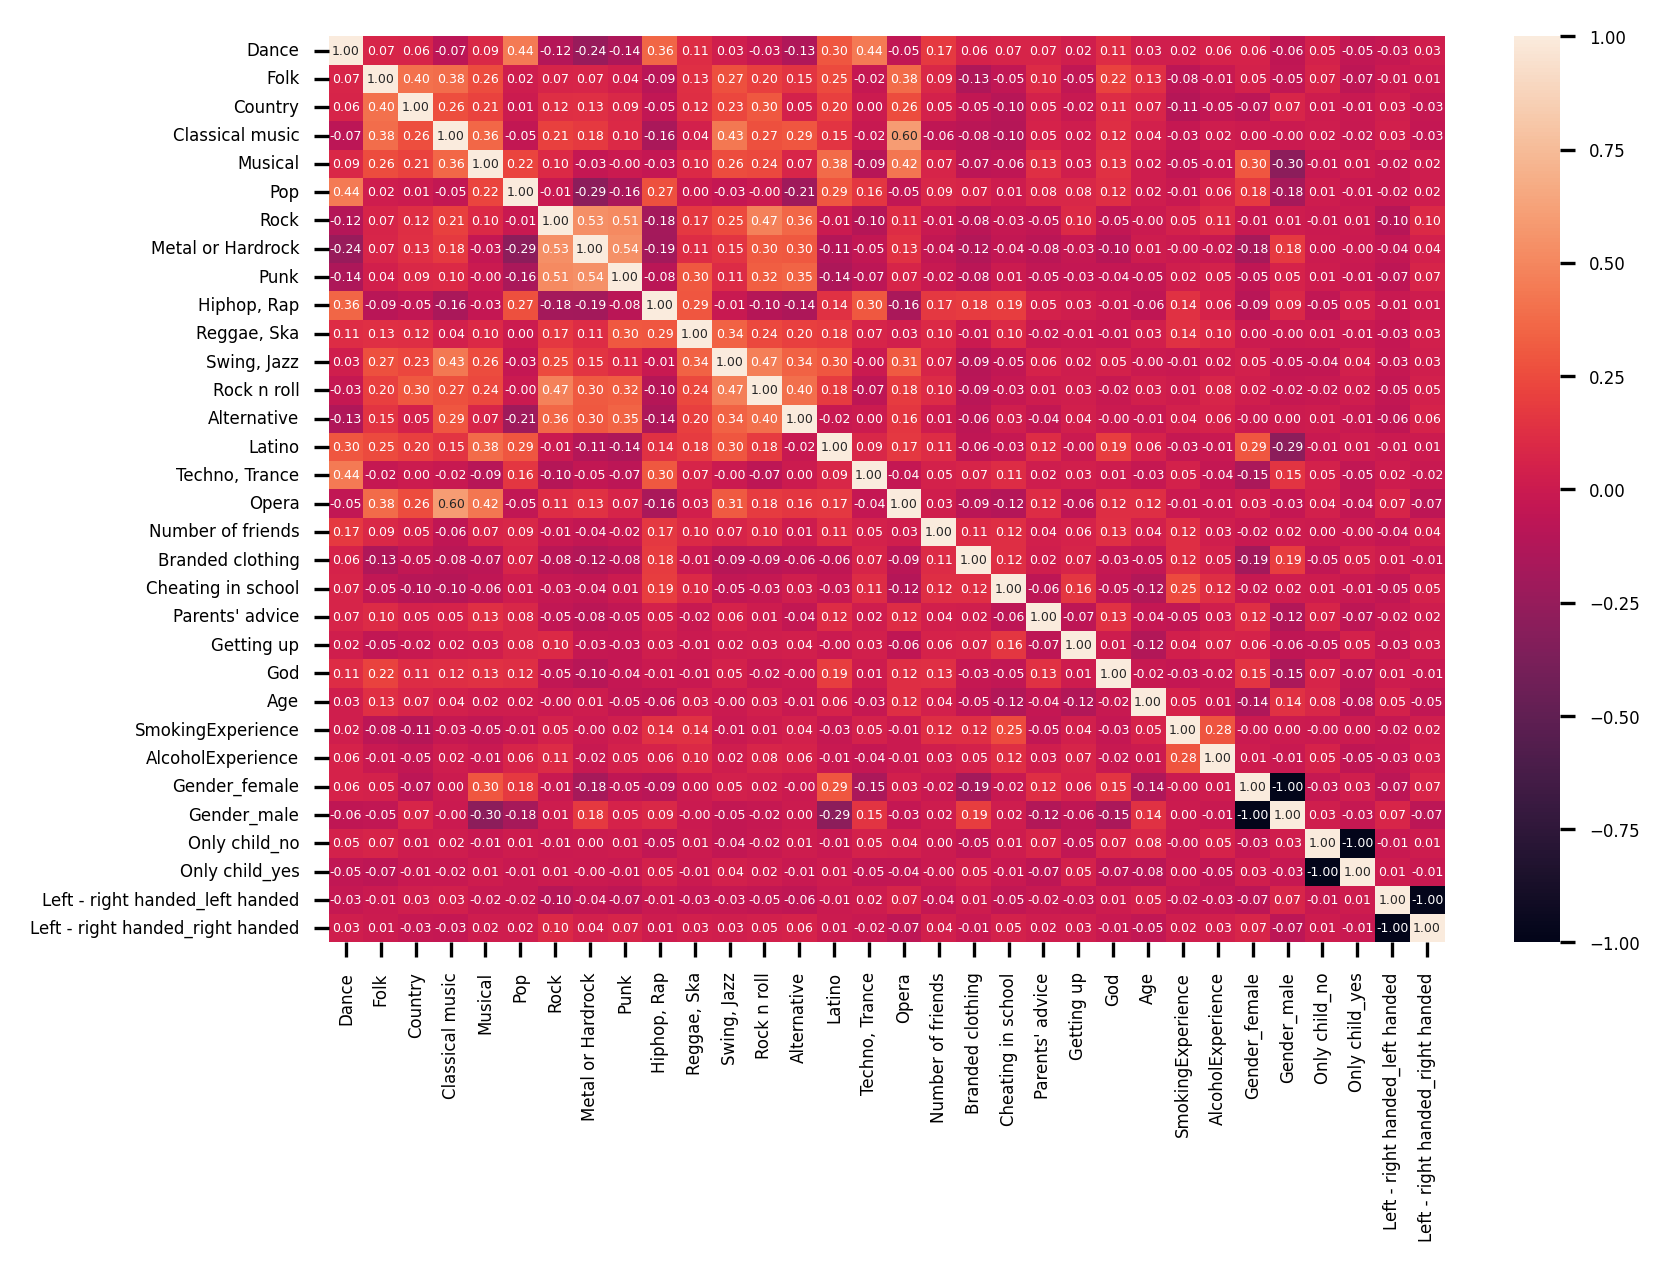

In [14]:
sns.heatmap(data.corr(), annot=True, fmt='.2f', annot_kws={'size':3});

### What is the proportion of individuals according to the gender?

It looks like proportion of individuals are more over same with 59% of females and 40% of males

In [15]:
data['Gender_female'].value_counts()/data.shape[0]

1    0.59558
0    0.40442
Name: Gender_female, dtype: float64

### What is the proportion of individuals according to the age?

Dataset is based mainly on data from young people between 18 and 22 years

In [16]:
data['Age'].value_counts()/data.shape[0]

19.000000    0.208840
20.000000    0.187845
21.000000    0.130387
18.000000    0.119337
22.000000    0.080663
17.000000    0.055249
23.000000    0.048619
24.000000    0.030939
16.000000    0.027624
25.000000    0.025414
26.000000    0.016575
27.000000    0.015470
28.000000    0.014365
29.000000    0.011050
30.000000    0.011050
15.000000    0.009945
20.433699    0.006630
Name: Age, dtype: float64

### How many of individuals have smoking experience?

Interesting is that at least 80% of young people has smoking experience.

In [17]:
data['SmokingExperience'].value_counts()/data.shape[0]

1    0.78895
0    0.21105
Name: SmokingExperience, dtype: float64

### How many of individuals have alcohol experience?

Almost 88% of individuals has some Alcohol experience.

In [18]:
data['AlcoholExperience'].value_counts()/data.shape[0]

1    0.882873
0    0.117127
Name: AlcoholExperience, dtype: float64

### When young people starsts with alcohol?

44% of young individuals starts with alcohol at age 15 while 100% has some experince at 28years

In [19]:
data.groupby('Age').mean()['AlcoholExperience'].sort_values()

Age
15.000000    0.444444
16.000000    0.560000
30.000000    0.600000
20.433699    0.666667
26.000000    0.733333
24.000000    0.785714
17.000000    0.820000
27.000000    0.857143
22.000000    0.876712
21.000000    0.881356
23.000000    0.886364
29.000000    0.900000
19.000000    0.915344
20.000000    0.929412
18.000000    0.953704
25.000000    0.956522
28.000000    1.000000
Name: AlcoholExperience, dtype: float64